import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error




import dataset

In [2]:
df=pd.read_csv("jamboree_dataset.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

Now we will check for null values and also will drop irrelevant columns 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Here there is no null values

In [6]:
df=df.drop(("Serial No."),axis = 1)

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Here we can consider Research as categorical and here target value is chance of admit 

Let see distribution of the variables of applicants

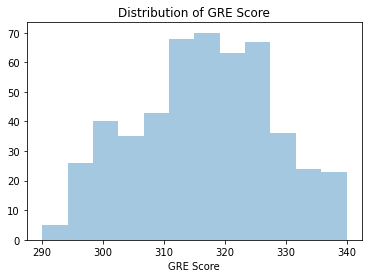

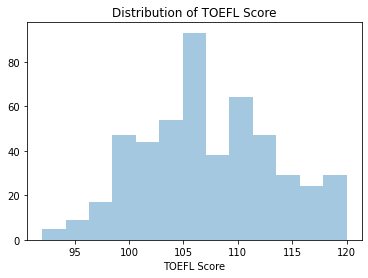

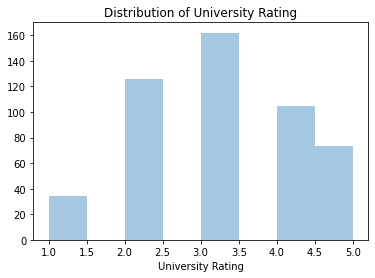

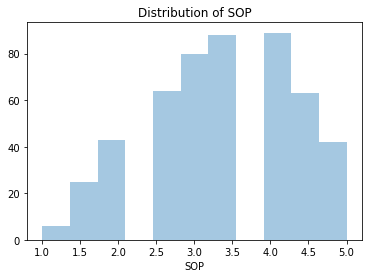

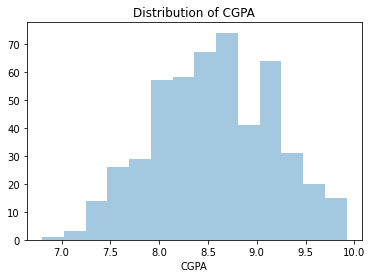

In [8]:
fig = sns.distplot(df["GRE Score"],kde = False)
plt.title("Distribution of GRE Score")
plt.show()

fig = sns.distplot(df["TOEFL Score"],kde = False)
plt.title("Distribution of TOEFL Score")
plt.show()

fig = sns.distplot(df["University Rating"],kde = False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df["SOP"],kde = False)
plt.title("Distribution of SOP")
plt.show()


fig = sns.distplot(df["CGPA"],kde = False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

Here CGPA,SOP,TOEFL score,University Rating are discrete and CGPA,TOEFL score AND GRE Score are normal distributions


Bivariate analysis

Now we are trying to understand relationship between various factors responsible for applicant admission

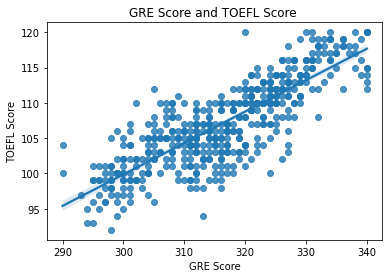

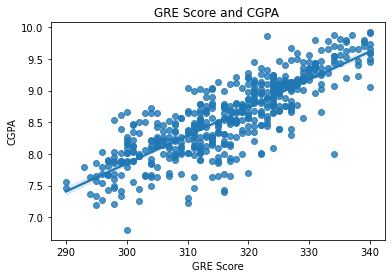

In [9]:
fig = sns.regplot(x="GRE Score",y="TOEFL Score",data=df)
plt.title("GRE Score and TOEFL Score ")
plt.show()

fig = sns.regplot(x="GRE Score",y="CGPA",data=df)
plt.title("GRE Score and CGPA ")
plt.show()



plt.show()


In [10]:
fig = sns.scatterplot(x="CGPA",y="LOR",data=df,hue="Research")
plt.title("LOR and CGPA")
plt.show()

ValueError: Could not interpret value `LOR` for parameter `y`

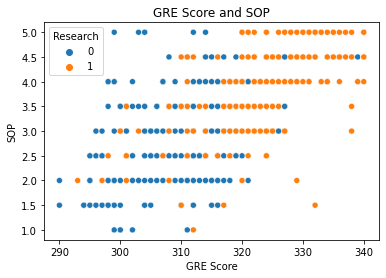

In [11]:
fig = sns.scatterplot(x="GRE Score",y="SOP",data=df,hue="Research")
plt.title("GRE Score and SOP")
plt.show()

CORRELATION AMONG VARIABLES

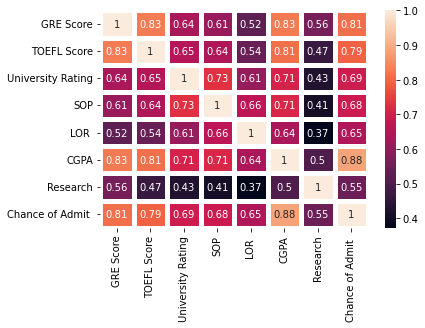

In [12]:
corr=df.corr()
sns.heatmap(corr,linewidth=5,annot=True)
plt.show()

split Training and Testing Dataset

In [13]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [15]:
X = df.drop(["Chance of Admit "],axis=1)
y = df["Chance of Admit "]

In [16]:
#X = strd_train1.drop('Loan_Status_1', axis=1)
#y = strd_train1.Loan_Status_1

In [17]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']


In [18]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3, random_state=42,shuffle=True)


In [20]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
5,330,115,5,4.5,3.0,9.34,1
116,299,102,3,4.0,3.5,8.62,0
45,322,110,5,5.0,4.0,9.10,1
16,317,107,3,4.0,3.0,8.70,0
462,307,105,4,3.0,3.0,7.94,0
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [21]:
y_train

5      0.90
116    0.56
45     0.88
16     0.66
462    0.62
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 350, dtype: float64

In [22]:
## standardisation

In [23]:
x_train_columns = X_train.columns
std = StandardScaler()
x_train_std = std.fit_transform(X_train)

In [24]:
x_train_std

array([[ 1.22318504,  1.27980924,  1.64786882, ..., -0.5291228 ,
         1.28550609,  0.88127734],
       [-1.61322396, -0.86815536, -0.08412544, ...,  0.01556244,
         0.07349047, -1.13471657],
       [ 0.49120853,  0.45366901,  1.64786882, ...,  0.56024767,
         0.88150088,  0.88127734],
       ...,
       [-1.33873276, -1.3638395 , -1.81611969, ..., -1.61849327,
        -2.23270591, -1.13471657],
       [-0.69825331, -0.37247122, -0.95012256, ...,  0.56024767,
        -1.50886325, -1.13471657],
       [-0.24076799, -0.20724318, -0.95012256, ...,  0.01556244,
        -0.54935089, -1.13471657]])

In [25]:
X_train = pd.DataFrame(x_train_std,columns = x_train_columns )

In [26]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.223185,1.279809,1.647869,1.133935,-0.529123,1.285506,0.881277
1,-1.613224,-0.868155,-0.084125,0.632828,0.015562,0.073490,-1.134717
2,0.491209,0.453669,1.647869,1.635043,0.560248,0.881501,0.881277
3,0.033723,-0.042015,-0.084125,0.632828,-0.529123,0.208159,-1.134717
4,-0.881247,-0.372471,0.781872,-0.369388,-0.529123,-1.071191,-1.134717
...,...,...,...,...,...,...,...
345,1.131688,0.618897,0.781872,1.133935,1.104933,1.016169,0.881277
346,-0.972745,-0.372471,-0.950123,-0.870496,-0.529123,-0.599852,0.881277
347,-1.338733,-1.363839,-1.816120,-1.371604,-1.618493,-2.232706,-1.134717
348,-0.698253,-0.372471,-0.950123,-0.870496,0.560248,-1.508863,-1.134717


In [29]:
models = [
             ["Linear Regression : ",LinearRegression()],
             ["Lasso Regression : ",Lasso(alpha=0.1)],
             ["Ridge Regression : ",Ridge(alpha=0.1)]
         ]
print("Results without removing featues with multicollinearity")
for name,model in models:
    model.fit(X_train,y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name,(np.sqrt(mean_squared_error(y_test,predictions))))

Results without removing featues with multicollinearity
Linear Regression :  0.06028447396511894
Lasso Regression :  0.12389822898932601
Ridge Regression :  0.06028378541695945


In [32]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.80e-122
Time:                        20:45:35   Log-Likelihood:                 491.18
No. Observations:                 350   AIC:                            -966.4
Df Residuals:                     342   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7241      0.00

In [33]:
X_train_new = X_train.drop(columns="SOP")

In [34]:
model1 = sm.OLS(y_train.values,X_train_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.80e-122
Time:                        20:55:21   Log-Likelihood:                 491.18
No. Observations:                 350   AIC:                            -966.4
Df Residuals:                     342   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7241      0.00

## VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif[ "features "] = dataset.columns
    vif[ "VIF_Value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [39]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.518240
2,TOEFL Score,3.450376
3,University Rating,2.343799
4,LOR,1.796590
5,CGPA,4.492399
6,Research,1.510036


## VIF looks fine and we can go ahead with predictions

In [40]:
X_test_std=std.transform(X_test)
X_test = pd.DataFrame(X_test_std,columns = x_train_columns )

In [41]:
X_test = sm.add_constant(X_test)

In [43]:
X_test_del = list(set(X_test.columns).difference(set(X_train_new.columns)))

In [45]:
print(f'Dropping (x_test_del) from test set')

Dropping (x_test_del) from test set


In [46]:
X_test_new = X_test.drop(columns=X_test_del)

In [47]:
# Prediction from the clean model

In [48]:
pred =  model1.predict(X_test_new)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print("Mean absolute error",mean_absolute_error(y_test.values,pred))
print("Root mean square error",np.sqrt(mean_squared_error(y_test.values,pred)))

Mean absolute error 0.042638558201971766
Root mean square error 0.060297111503062405


## mean of residuals

In [49]:
residuals = y_test.values - pred
mean_residuals = np.mean(residuals)
print("mean of residuals {}".format(mean_residuals) )

mean of residuals -0.00586934920888399


## Test for Homoscedasticity

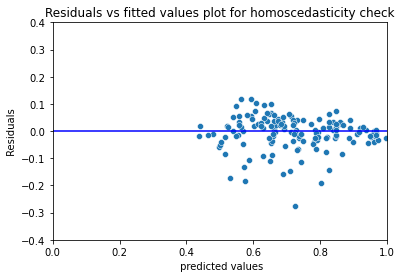

In [50]:
p = sns.scatterplot(x = pred,y = residuals)
plt.xlabel(" predicted values")
plt.ylabel(" Residuals ")
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color="blue")
p = plt.title("Residuals vs fitted values plot for homoscedasticity check")

In [53]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F.statistic","p-value"]
test = sms.het_goldfeldquandt(residuals, X_test)

In [54]:
lzip(name,test)

[('F.statistic', 0.8486178148416372), ('p-value', 0.748227458248321)]

## since p value greater than 0.05,we reject null hypothesis.here null hypothesis is error terms are homoscedastic

## Normality of residuals

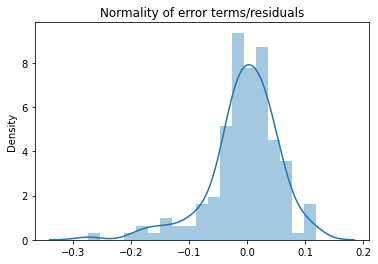

In [56]:
p = sns.distplot(residuals,kde=True)
p=plt.title("Normality of error terms/residuals")

### Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

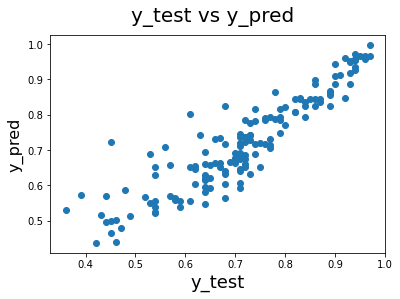

In [57]:
fig = plt.figure()
plt.scatter(y_test.values,pred)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)